## Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and 
flip them on at a higher price. For the same purpose, the company has collected 
a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required
to build a regression model using regularisation in order to predict the actual value of the
prospective properties and decide whether to invest in them or not.

The company wants to know:

i) Which variables are significant in predicting the price of a house,

ii) How well those variables describe the price of a house.

### Step 1 : Data Understanding and Exploration 

In [290]:
# import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [291]:
import warnings
warnings.filterwarnings('ignore')

In [292]:
# Reading the datasets
house = pd.read_csv('D:/UPGRAD/Main_course/Logistic Regression/Housing Assignment/train.csv')


In [293]:
# check shape
print(house.shape)

(1460, 81)


In [294]:
# look a first 10 rows of training data
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [295]:
# see all the column names
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [296]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Insight :

There are 1459 rows and 80 columns

There are columns with large number of null entries like PoolQC, MiscFeature etc

The columns have Three types of datatypes: float64(11), int64(26), object(43)

In [297]:
#looking at the label to predict 
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Observation :

i)The average SalePrice of a house is 180,921

ii)The Maximum SalePrice of a house is 755,000 and Minimum 34,900

<AxesSubplot:>

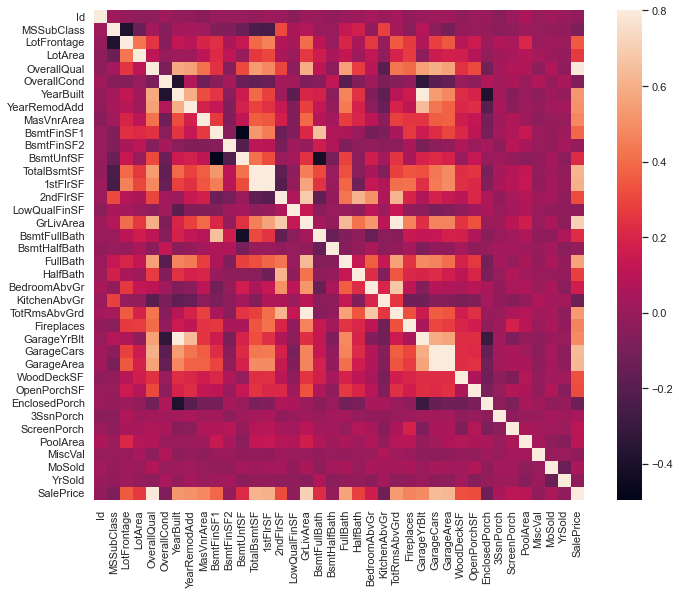

In [298]:
#correlation matrix
corr_mat = house.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, vmax = 0.8, square = True)

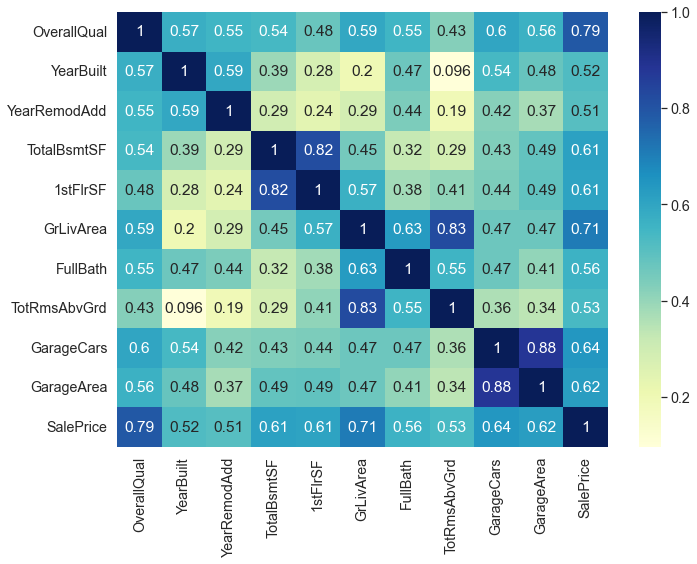

In [299]:
# most correlated features
corr_mat = house.corr()
sns.set(font_scale=1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat['SalePrice'])> 0.5]
g = sns.heatmap(house[top_corr].corr(),annot = True, cmap = "YlGnBu")

Observation :

OverallQual and GrLivArea seem to be the most correlated to SalePrice.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

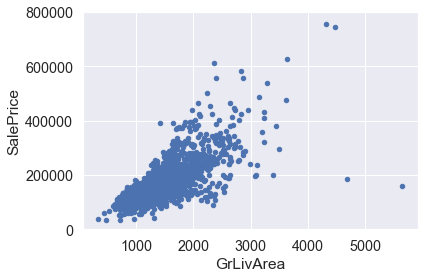

In [300]:
#scatter plot SalePrice/GrLivArea
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

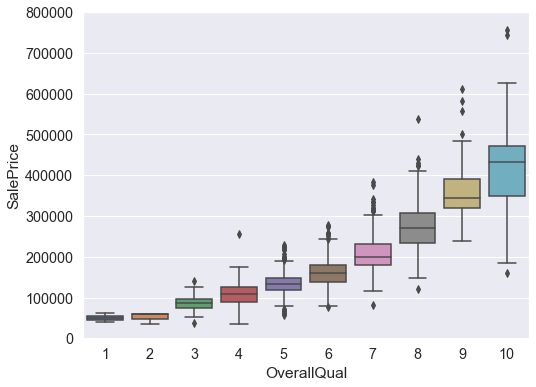

In [301]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'],house[var]],axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var,y="SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)

In [302]:
print("Correlation Values")

corr = house.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

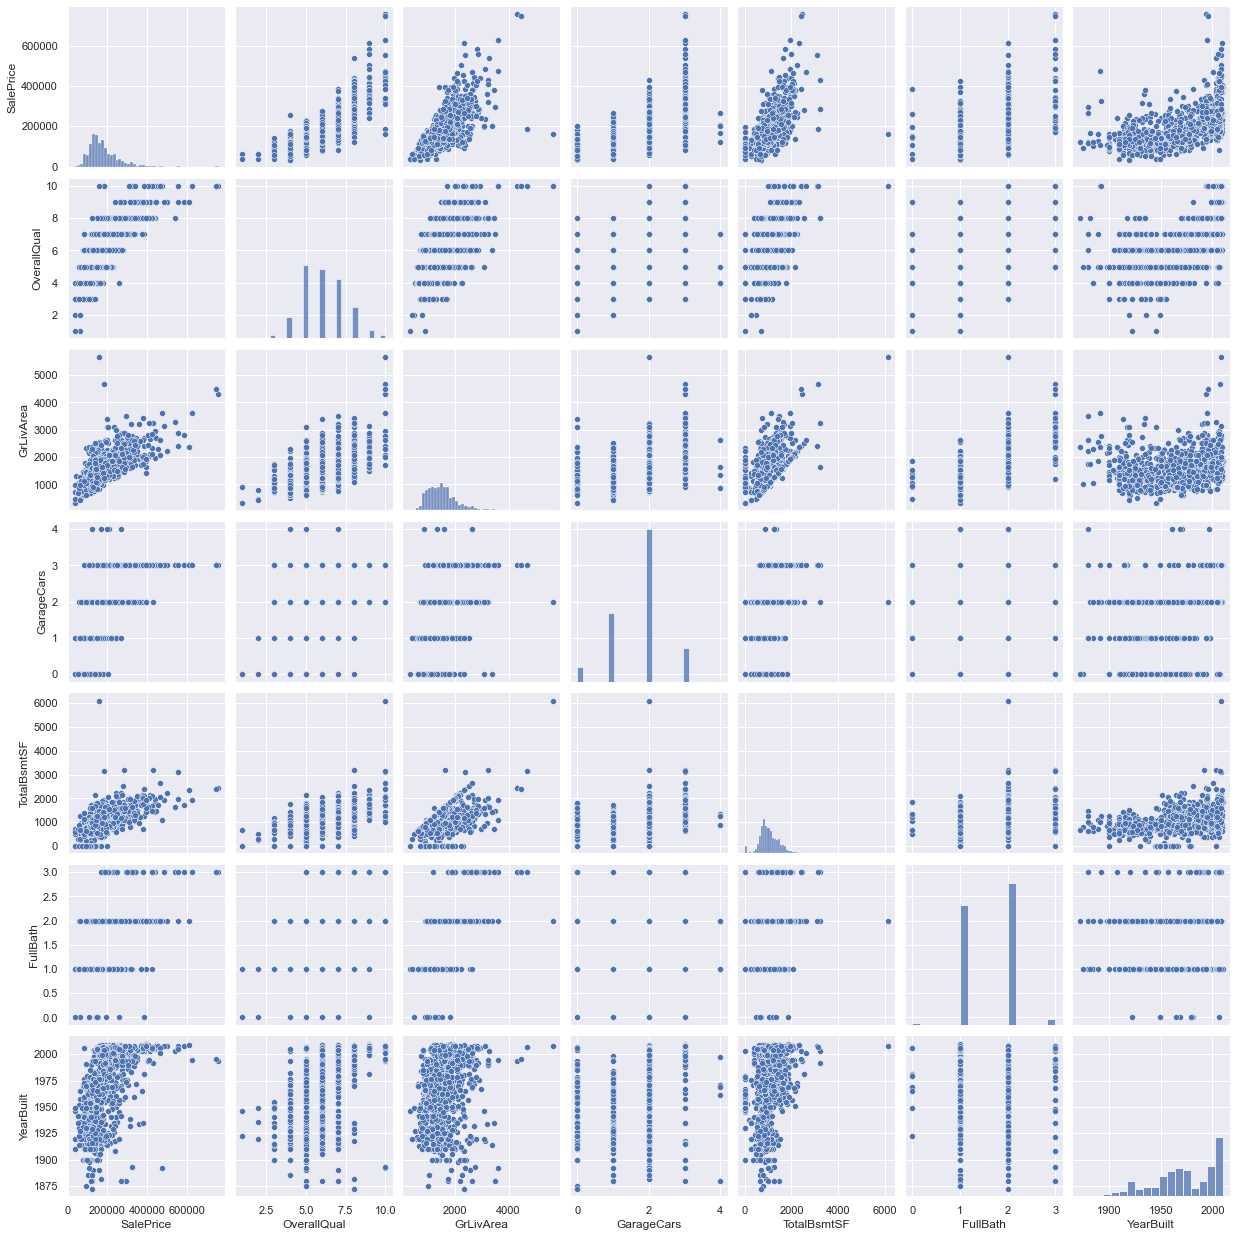

In [303]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

### Step 2 : Data Cleaning

#### Checking for Outliers 

In [304]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = house[a], y = house['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 864x864 with 0 Axes>

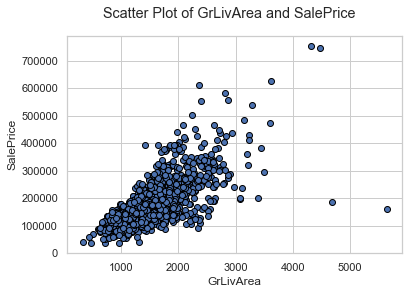

In [305]:
scatter_plot('GrLivArea')

i) It can be observed that there are large outliers which can negatively affect the prediction of sale price highly

ii) So the outliers need to be deleted

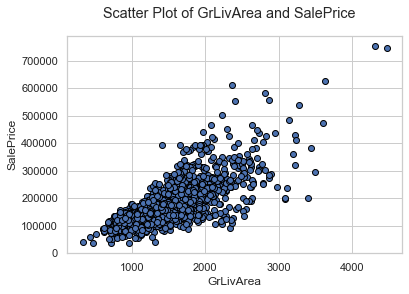

In [306]:
#Deleting outliers
house =  house.drop( house[( house['GrLivArea'] > 4000) & ( house['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

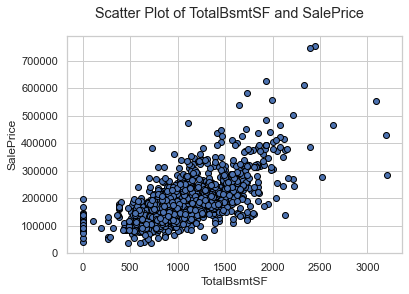

In [307]:
scatter_plot('TotalBsmtSF')

There are not too many outliers 

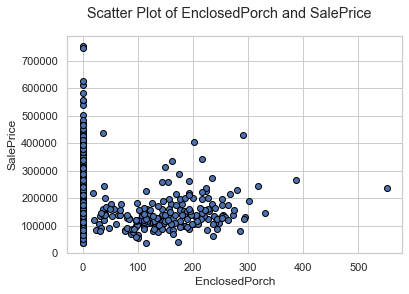

In [308]:
scatter_plot('EnclosedPorch')

There is are some outliers that should be deleted so that it doesnt affect our predictions much

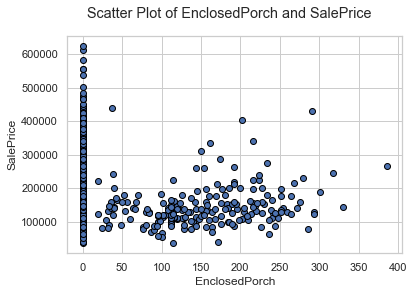

In [309]:
#Deleting outliers
house =  house.drop( house[( house['EnclosedPorch']>400)].index)

#Deleting outliers
house =  house.drop( house[( house['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

(-0.5, 9.5, 0.0, 800000.0)

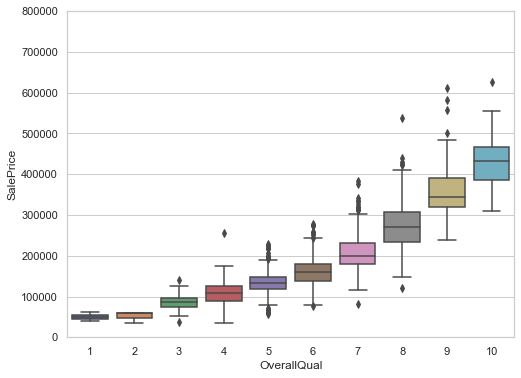

In [310]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'],house[var]],axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var,y="SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)

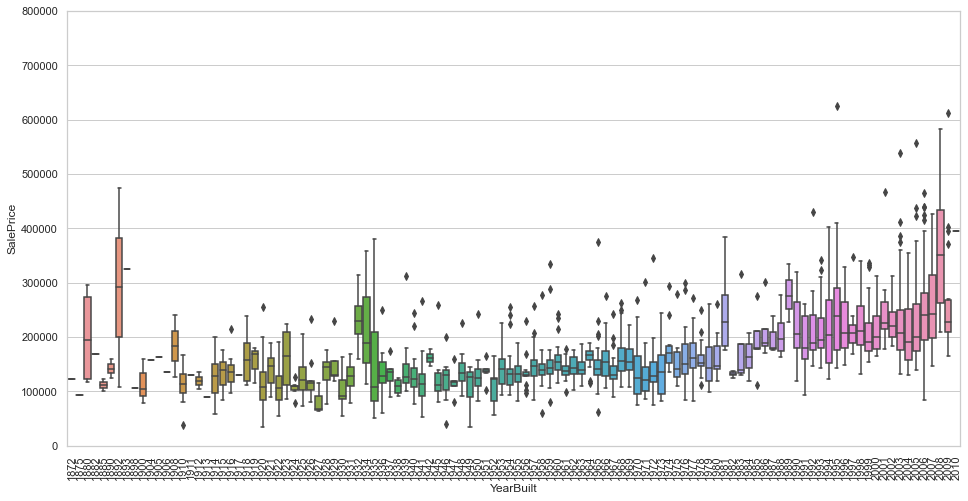

In [311]:
#box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Handling missing data 

In [312]:
total = house.isnull().sum().sort_values(ascending = False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis =1, keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1451,0.997251
MiscFeature,1401,0.962887
Alley,1364,0.937457
Fence,1176,0.808247
FireplaceQu,690,0.474227
LotFrontage,259,0.178007
GarageYrBlt,81,0.055670
GarageCond,81,0.055670
GarageType,81,0.055670
GarageFinish,81,0.055670


In [313]:
#Places where NAN means something .
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [314]:
#Placing the value "None" where NAN value aprears 
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [315]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.178007
GarageYrBlt,81,0.055670
MasVnrType,8,0.005498
MasVnrArea,8,0.005498
Electrical,1,0.000687
KitchenQual,0,0.000000


LotFrontage has too many Null values and it is a numarical value so it may be better to just drop it .

In [316]:
house.drop("LotFrontage", axis=1, inplace=True)

In [317]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055670
MasVnrType,8,0.005498
MasVnrArea,8,0.005498
Electrical,1,0.000687
KitchenQual,0,0.000000


In [318]:
# Fill with median value for missing data of numaric fields
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [319]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000687
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [320]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Electrical,1,0.000687
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


In [321]:
#Now only 'Electrical' has null entry,so dropping it  
house.dropna(inplace = True)

In [322]:
#checking missing data again
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [323]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1454 non-null   int64  
 1   MSSubClass     1454 non-null   int64  
 2   MSZoning       1454 non-null   object 
 3   LotArea        1454 non-null   int64  
 4   Street         1454 non-null   object 
 5   Alley          1454 non-null   object 
 6   LotShape       1454 non-null   object 
 7   LandContour    1454 non-null   object 
 8   Utilities      1454 non-null   object 
 9   LotConfig      1454 non-null   object 
 10  LandSlope      1454 non-null   object 
 11  Neighborhood   1454 non-null   object 
 12  Condition1     1454 non-null   object 
 13  Condition2     1454 non-null   object 
 14  BldgType       1454 non-null   object 
 15  HouseStyle     1454 non-null   object 
 16  OverallQual    1454 non-null   int64  
 17  OverallCond    1454 non-null   int64  
 18  YearBuil

#### Determine the data type of all remaining feature 

In [324]:
types_train = house.dtypes
types_train

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object

In [325]:
types_train.value_counts()

object     43
int64      35
float64     2
dtype: int64

In [326]:
num_types = types_train[(types_train == 'int64')| (types_train == 'float')]
cat_types = types_train[types_train == 'object']

In [327]:
#Convert the num_types to list
num_train_values = list(num_types.index)

In [328]:
print(num_train_values)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [329]:
#convert the cat_tyeps to list
cat_train_values = list(cat_types.index)

In [330]:
print(cat_train_values)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Step 3: Data Preparation

Skewness: 1.566643
Kurtosis: 3.883136


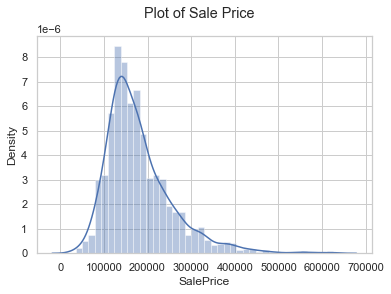

In [331]:
sns.distplot(house['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

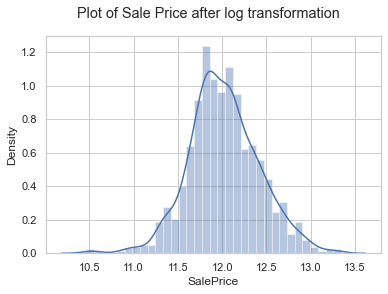

In [332]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

house['SalePrice'] = np.log(house['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(house['SalePrice'])
plt.show()

In [333]:
# Creating one new field with transformed SalePrice Values to its log values . 
house['TransformedPrice'] = np.log(house['SalePrice'])

In [334]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1454 non-null   int64  
 1   MSSubClass        1454 non-null   int64  
 2   MSZoning          1454 non-null   object 
 3   LotArea           1454 non-null   int64  
 4   Street            1454 non-null   object 
 5   Alley             1454 non-null   object 
 6   LotShape          1454 non-null   object 
 7   LandContour       1454 non-null   object 
 8   Utilities         1454 non-null   object 
 9   LotConfig         1454 non-null   object 
 10  LandSlope         1454 non-null   object 
 11  Neighborhood      1454 non-null   object 
 12  Condition1        1454 non-null   object 
 13  Condition2        1454 non-null   object 
 14  BldgType          1454 non-null   object 
 15  HouseStyle        1454 non-null   object 
 16  OverallQual       1454 non-null   int64  


In [335]:
#Convert Categorical values to representative number . 
for i in cat_train_values:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [336]:
house[cat_train_values]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,1,1,3,0,0,2,22,5,...,5,0,1,1,2,2,4,3,4,0
1,0,0,1,1,3,0,1,2,3,3,...,5,0,1,1,2,2,4,3,4,0
2,0,0,1,2,3,0,0,2,22,5,...,5,0,1,1,2,2,4,3,4,0
3,0,0,1,2,3,0,3,2,13,5,...,4,3,1,1,2,2,4,3,4,1
4,0,0,1,2,3,0,1,2,1,5,...,5,0,1,1,2,2,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,1,3,0,0,2,24,5,...,5,0,1,1,2,2,4,3,4,0
1456,0,0,1,1,3,0,0,2,7,5,...,5,3,1,1,2,2,2,3,4,0
1457,0,0,1,1,3,0,0,2,13,5,...,5,0,1,1,2,2,3,0,4,0
1458,0,0,1,1,3,0,0,2,2,5,...,5,3,1,1,2,2,4,3,4,0


Now all the categorical variables are converted into representive numbers.

### Step 4 :Model Building 

In [337]:
#Creating X and y Dataframe 
X = house.drop(["Id", "SalePrice","TransformedPrice"],axis=1).values
y = house["TransformedPrice"].values

In [338]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [339]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [340]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [341]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [342]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013340,0.001657,0.002012,0.000658,0.0001,{'alpha': 0.0001},-0.008101,-0.007692,-0.007004,-0.007002,...,-0.007375,0.000446,1,-0.006633,-0.006574,-0.006774,-0.006855,-0.006819,-0.006731,0.000109
1,0.010770,0.001828,0.002601,0.000494,0.001,{'alpha': 0.001},-0.008073,-0.008317,-0.007287,-0.006845,...,-0.007556,0.000550,2,-0.007090,-0.007089,-0.007287,-0.007453,-0.007368,-0.007257,0.000147
2,0.020154,0.006272,0.001788,0.000755,0.01,{'alpha': 0.01},-0.009156,-0.010445,-0.009254,-0.008941,...,-0.009414,0.000529,3,-0.009226,-0.008836,-0.009197,-0.009346,-0.009165,-0.009154,0.000171
3,0.029985,0.005482,0.002538,0.000432,0.05,{'alpha': 0.05},-0.009706,-0.010738,-0.009814,-0.009205,...,-0.009810,0.000508,4,-0.009658,-0.009331,-0.009648,-0.009771,-0.009643,-0.009610,0.000147
4,0.018550,0.002410,0.002594,0.000798,0.1,{'alpha': 0.1},-0.010871,-0.011322,-0.010579,-0.009990,...,-0.010583,0.000483,5,-0.010470,-0.010171,-0.010406,-0.010616,-0.010449,-0.010422,0.000144


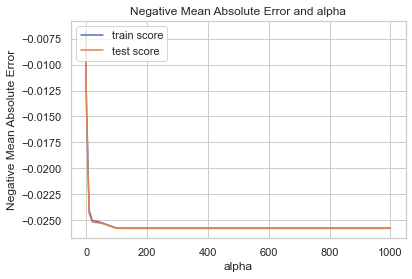

In [343]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [344]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=50)

In [345]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  3.17920054e-07, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [346]:
y3_pred = lasso.predict(X_train)

In [347]:
#caculate root mean square error
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y3_pred,y_train))
rmse

0.032349445315187124

In [348]:
#predict value of sale price on the validation set
y2_pred_v = lasso.predict(X_test)

#caculate root mean square error
rmse = np.sqrt(metrics.mean_squared_error(y3_pred_v,y_test))
rmse

0.03224915407598848

In [349]:
# Applying Ridge
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [350]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007588,0.000495,0.001987,0.000645,0.0001,{'alpha': 0.0001},-0.008569,-0.007579,-0.007142,-0.007186,...,-0.007544,0.000535,27,-0.006537,-0.006579,-0.006758,-0.006881,-0.006815,-0.006714,0.000134
1,0.008758,0.001581,0.002393,0.000798,0.001,{'alpha': 0.001},-0.008569,-0.007580,-0.007142,-0.007186,...,-0.007544,0.000535,26,-0.006537,-0.006579,-0.006758,-0.006881,-0.006815,-0.006714,0.000134
2,0.008192,0.001915,0.002571,0.000517,0.01,{'alpha': 0.01},-0.008568,-0.007580,-0.007142,-0.007186,...,-0.007544,0.000535,25,-0.006537,-0.006579,-0.006758,-0.006881,-0.006816,-0.006714,0.000134
3,0.007189,0.001478,0.001586,0.000789,0.05,{'alpha': 0.05},-0.008564,-0.007581,-0.007141,-0.007186,...,-0.007543,0.000533,24,-0.006537,-0.006581,-0.006760,-0.006881,-0.006818,-0.006715,0.000134
4,0.007780,0.002221,0.002391,0.000478,0.1,{'alpha': 0.1},-0.008559,-0.007583,-0.007140,-0.007186,...,-0.007542,0.000532,23,-0.006537,-0.006582,-0.006762,-0.006881,-0.006820,-0.006716,0.000134


In [286]:
#predict value of sale price on the validation set
y3_pred_v = lasso.predict(X_test)

#caculate root mean square error
rmse = np.sqrt(metrics.mean_squared_error(y3_pred_v,y_test))
rmse

0.03224915407598848

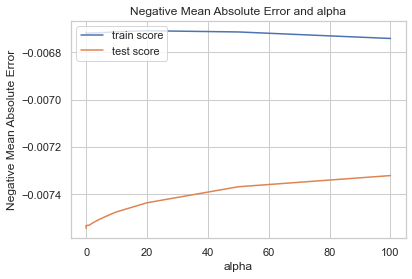

In [287]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [288]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  3.17920054e-07, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

Observations:

RMSE:

ridge : 0.03224915407598848

lasso : 0.03224915407598848